# EXERCICE 6 : PLS

inspire de http://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_compare_cross_decomposition.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from IPython.display import display

## regression PLS avec reponse univariee (PLS1)

In [26]:
#Generation de donnees
n = 1000
p = 10
X = np.random.normal(size=n * p).reshape((n, p))
y = X[:, 0] + 2 * X[:, 1] + 0.5 * X[:, 2]*X[:, 3] + np.random.normal(size=n) + 5

display(X)


array([[-0.27374112, -1.87702539,  0.40569206, ...,  0.88252222,
        -0.5036287 , -0.93494984],
       [-1.48018556,  0.35495076, -0.74379731, ...,  0.5194333 ,
        -1.59465751,  1.53099908],
       [ 0.35864141, -0.42272469, -0.61051617, ..., -0.85669929,
         1.60244898, -1.38071603],
       ...,
       [-0.33364155,  0.16391825, -0.59145759, ..., -1.01945376,
        -1.07265905,  0.6712203 ],
       [ 1.13908305,  1.08906224,  0.92709963, ...,  1.677416  ,
        -0.4326975 ,  2.06274447],
       [-0.15660098,  0.45869728,  1.79241733, ..., -1.27472211,
         0.55819932, -0.11371602]])

## QUESTION 1: 
Comment sont construites les donnees simulees ? 

Que vous attendez-vous a voir dans la PLS

In [27]:
?np.random.normal

Docstring:
normal(loc=0.0, scale=1.0, size=None)

Draw random samples from a normal (Gaussian) distribution.

The probability density function of the normal distribution, first
derived by De Moivre and 200 years later by both Gauss and Laplace
independently [2]_, is often called the bell curve because of
its characteristic shape (see the example below).

The normal distributions occurs often in nature.  For example, it
describes the commonly occurring distribution of samples influenced
by a large number of tiny, random disturbances, each with its own
unique distribution [2]_.

.. note::
    New code should use the ``normal`` method of a ``default_rng()``
    instance instead; see `random-quick-start`.

Parameters
----------
loc : float or array_like of floats
    Mean (&quot;centre&quot;) of the distribution.
scale : float or array_like of floats
    Standard deviation (spread or &quot;width&quot;) of the distribution. Must be
    non-negative.
size : int or tuple of ints, optional
   

In [28]:
?PLSRegression

Init signature:
PLSRegression(
    n_components=2,
    *,
    scale=True,
    max_iter=500,
    tol=1e-06,
    copy=True,
)
Docstring:     
PLS regression

PLSRegression implements the PLS 2 blocks regression known as PLS2 or PLS1
in case of one dimensional response.
This class inherits from _PLS with mode=&quot;A&quot;, deflation_mode=&quot;regression&quot;,
norm_y_weights=False and algorithm=&quot;nipals&quot;.

Read more in the :ref:`User Guide &lt;cross_decomposition&gt;`.

.. versionadded:: 0.8

Parameters
----------
n_components : int, (default 2)
    Number of components to keep.

scale : boolean, (default True)
    whether to scale the data

max_iter : an integer, (default 500)
    the maximum number of iterations of the NIPALS inner loop (used
    only if algorithm=&quot;nipals&quot;)

tol : non-negative real
    Tolerance used in the iterative algorithm default 1e-06.

copy : boolean, default True
    Whether the deflation should be done on a copy. Let the default
    value t

In [29]:
pls1 = PLSRegression()
pls1.fit(X, y)

PLSRegression()

## QUESTION 2: 
Quelle est la signification de `pls1.x_rotations_`. Comment l'interpretez vous ?

pls1.x_rotations_=array([[ 0.45746882,  0.14354502],
       [ 0.88326531, -0.30290456],
       [-0.05081597, -0.33799232],
       [ 0.01418525,  0.06689988],
       [-0.02058155, -0.16893742],
       [ 0.04223413,  0.58508375],
       [-0.01461807, -0.29516401],
       [-0.0394033 , -0.26629271],
       [-0.02874126, -0.32552256],
       [ 0.05460307,  0.38246854]])


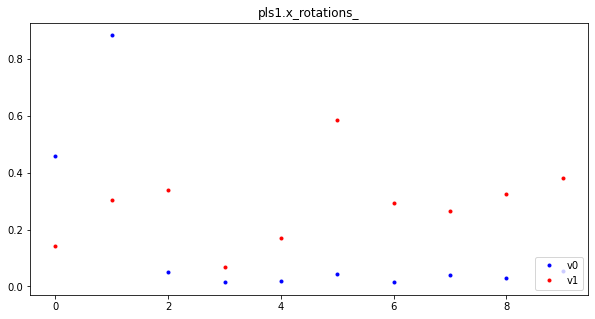

In [30]:
print(f"{pls1.x_rotations_=}")

fig = plt.figure(figsize=(10,5))
plt.plot([abs(e[0]) for e in pls1.x_rotations_], 'b.')
plt.plot([abs(e[1]) for e in pls1.x_rotations_], 'r.')
plt.legend(('v0', 'v1'), loc='lower right')
plt.title('pls1.x_rotations_')
plt.show()

pls1.x_weights_=array([[ 0.45746882,  0.19410374],
       [ 0.88326531, -0.2052875 ],
       [-0.05081597, -0.34360842],
       [ 0.01418525,  0.06846761],
       [-0.02058155, -0.17121206],
       [ 0.04223413,  0.5897514 ],
       [-0.01461807, -0.29677957],
       [-0.0394033 , -0.2706475 ],
       [-0.02874126, -0.328699  ],
       [ 0.05460307,  0.38850318]])


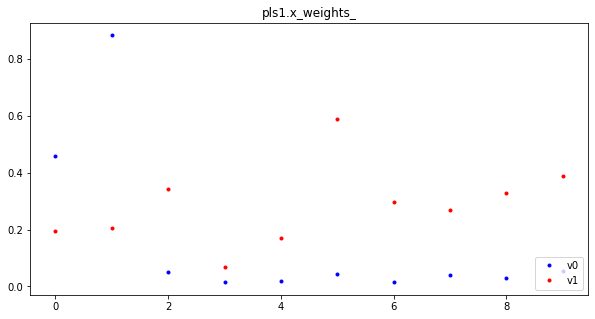

In [31]:
print(f"{pls1.x_weights_=}")

fig = plt.figure(figsize=(10,5))
plt.plot([abs(e[0]) for e in pls1.x_weights_], 'b.')
plt.plot([abs(e[1]) for e in pls1.x_weights_], 'r.')
plt.legend(('v0', 'v1'), loc='lower right')
plt.title('pls1.x_weights_')
plt.show()

Que renvoi de plus `pls1.predict(X)` ? Comparez ce resultat a `y`.

mse=1.2121695708123603


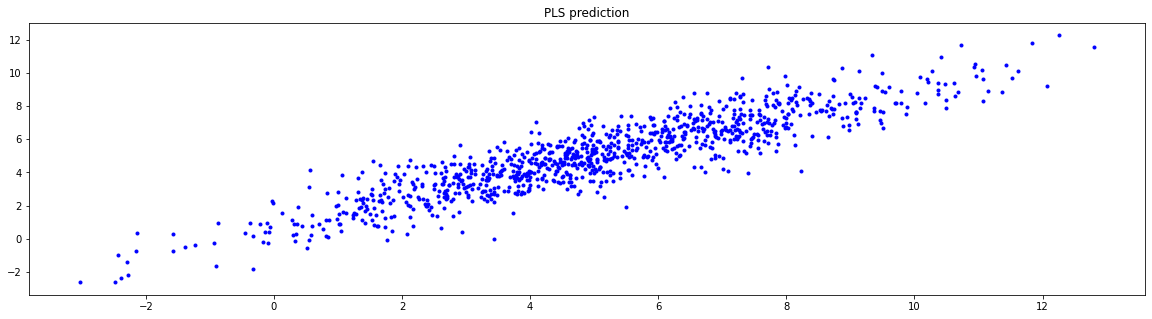

In [32]:
y_hat = pls1.predict(X)[:,0]
errors = y - y_hat

mse = mean_squared_error(y, y_hat)
print(f"{mse=}")

fig = plt.figure(figsize=(20,5))
plt.plot(y, y_hat, 'b.')
plt.title('PLS prediction')
plt.show()

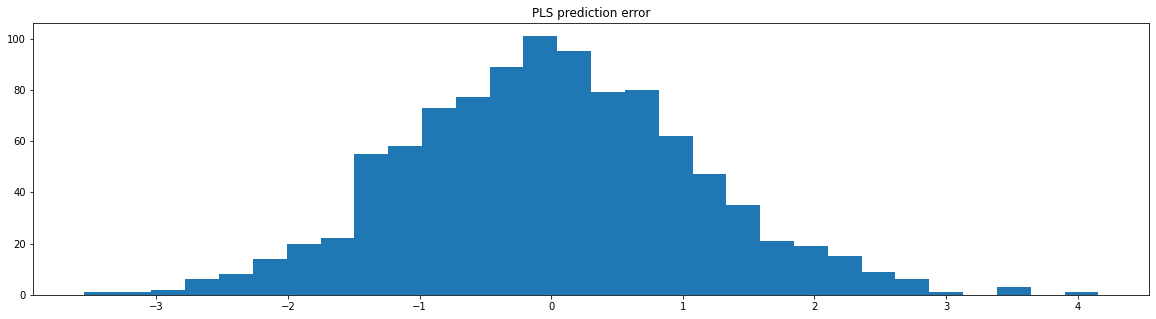

In [33]:
fig = plt.figure(figsize=(20,5))
plt.hist(errors, bins =30)
plt.title('PLS prediction error')
plt.show()

{&#39;whiskers&#39;: [&lt;matplotlib.lines.Line2D at 0x7f4348524760&gt;,
  &lt;matplotlib.lines.Line2D at 0x7f4348510a60&gt;],
 &#39;caps&#39;: [&lt;matplotlib.lines.Line2D at 0x7f4348510370&gt;,
  &lt;matplotlib.lines.Line2D at 0x7f4348510f40&gt;],
 &#39;boxes&#39;: [&lt;matplotlib.lines.Line2D at 0x7f4348524670&gt;],
 &#39;medians&#39;: [&lt;matplotlib.lines.Line2D at 0x7f43485108e0&gt;],
 &#39;fliers&#39;: [&lt;matplotlib.lines.Line2D at 0x7f4348519f40&gt;],
 &#39;means&#39;: []}

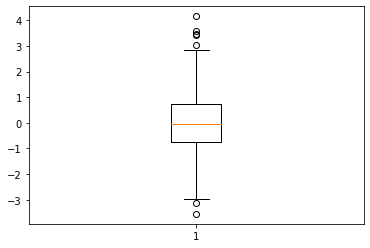

In [34]:
plt.boxplot(errors)

## QUESTION 3: 
Est-ce qu'une regression lineaire multiple avec selection de modele conduirait a des resultats similaires ?

In [35]:
def lasso(X_train,y_train, X_test,y_test, alpha, ax = []):
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X_train, y_train)

    y_pred_lasso = lasso_regressor.predict(X_test)
    mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)
    print(f"{alpha=}, \t {mse_score_lasso=}")

    if len(ax) > 0:
        ax[0].plot(y_test, y_pred_lasso, 'b.')
        ax[0].set_xlabel('True value')
        ax[0].set_ylabel('Predicted value')
        ax[0].set_title(f"True vs predicted value {mse_score_lasso=}")

        ax[1].plot(lasso_regressor.coef_, 'r.')
        ax[1].legend(['Beta estime'], loc='lower right')
        ax[1].set_title('Coefficients de beta')
    return lasso_regressor

In [36]:
from sklearn.model_selection import KFold

def k_fold(X, y, alphas, n=8):
    print(f"\n\t K-fold with alpha in {alphas}")
    kf = KFold(n_splits=n)
    for alpha in alphas:
        sum_mse_scores=0.
        for train, test in kf.split(X):
            X_train=X[train]
            y_train=y[train]
            X_test=X[test]
            y_test=y[test]
        
            lasso_regressor = Lasso(alpha=alpha)
            lasso_regressor.fit(X_train, y_train)
        
            y_pred_lasso = lasso_regressor.predict(X_test)
            mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)
            sum_mse_scores+=mse_score_lasso
        print(f"{alpha=}, total: {sum_mse_scores}")

In [38]:
alphas = [0.001,0.01,0.1,1.,10., 100.]
k_fold(X_center, y, alphas)

alphas = [0.001,0.005,0.01,0.05, 0.1]
k_fold(X_center, y, alphas)


alphas = [0.01,0.03,0.05,0.07, 0.1]
k_fold(X_center, y, alphas)


	 K-fold with alpha in [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
alpha=0.001, total: 55.326640534148
alpha=0.01, total: 55.22472263530252
alpha=0.1, total: 54.49374665230137
alpha=1.0, total: 54.38301684647112
alpha=10.0, total: 54.38301684647112
alpha=100.0, total: 54.38301684647112

	 K-fold with alpha in [0.001, 0.005, 0.01, 0.05, 0.1]
alpha=0.001, total: 55.326640534148
alpha=0.005, total: 55.27943695792855
alpha=0.01, total: 55.22472263530252
alpha=0.05, total: 54.850804619859375
alpha=0.1, total: 54.49374665230137

	 K-fold with alpha in [0.01, 0.03, 0.05, 0.07, 0.1]
alpha=0.01, total: 55.22472263530252
alpha=0.03, total: 55.044996727409185
alpha=0.05, total: 54.850804619859375
alpha=0.07, total: 54.66031269628772
alpha=0.1, total: 54.49374665230137


alpha=0.05, 	 mse_score_lasso=1.2145392712520338


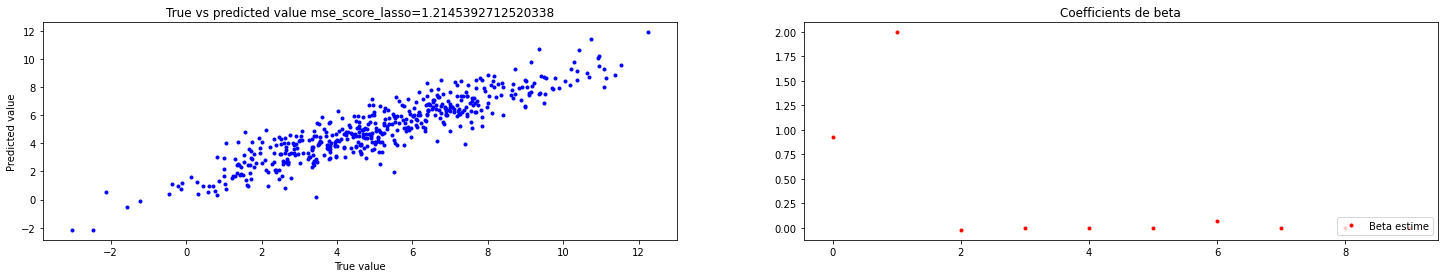

In [39]:
thresh = len(y)//2
fig, axs = plt.subplots(1, 2, figsize=(25,4))
X_center = preprocessing.scale(X)
lasso_result = lasso(X_center[thresh:], y[thresh:], X_center[:thresh], y[:thresh], 0.05, axs)

## regression PLS avec reponse multivariee (PLS2)

In [41]:
#Generation de donnees
n = 1000
q = 3
p = 10
X = np.random.normal(size=n * p).reshape((n, p))
B = np.array([[1., 2.] + [0] * (p - 2)] * q)
B[1,0]/=2.
B[2,1]/=2.
Y = np.dot(X, B.transpose()) + np.random.normal(size=n * q).reshape((n, q))/2


## QUESTION 4: 
Comment sont construites les donnees simulees ? 

## QUESTION 5: 
Predisez maintenant Y a l'aide de X. Qu'observez vous ?

In [42]:
pls2 = PLSRegression()
pls2.fit(X, Y)


PLSRegression()

pls2.x_rotations_=array([[ 0.44141283,  0.8997706 ],
       [ 0.89162565, -0.41685365],
       [-0.00444441,  0.02954778],
       [-0.02602136,  0.02920933],
       [-0.01107224,  0.05690495],
       [ 0.03463905,  0.04969716],
       [ 0.06405927,  0.0029376 ],
       [ 0.06320354,  0.03543452],
       [-0.00598263,  0.03160019],
       [-0.00224157,  0.08785258]])


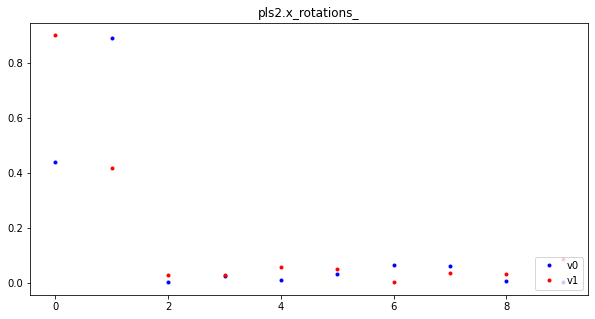

In [43]:
print(f"{pls2.x_rotations_=}")

fig = plt.figure(figsize=(10,5))
plt.plot([abs(e[0]) for e in pls2.x_rotations_], 'b.')
plt.plot([abs(e[1]) for e in pls2.x_rotations_], 'r.')
plt.legend(('v0', 'v1'), loc='lower right')
plt.title('pls2.x_rotations_')
plt.show()

mse=0.2938531758096072


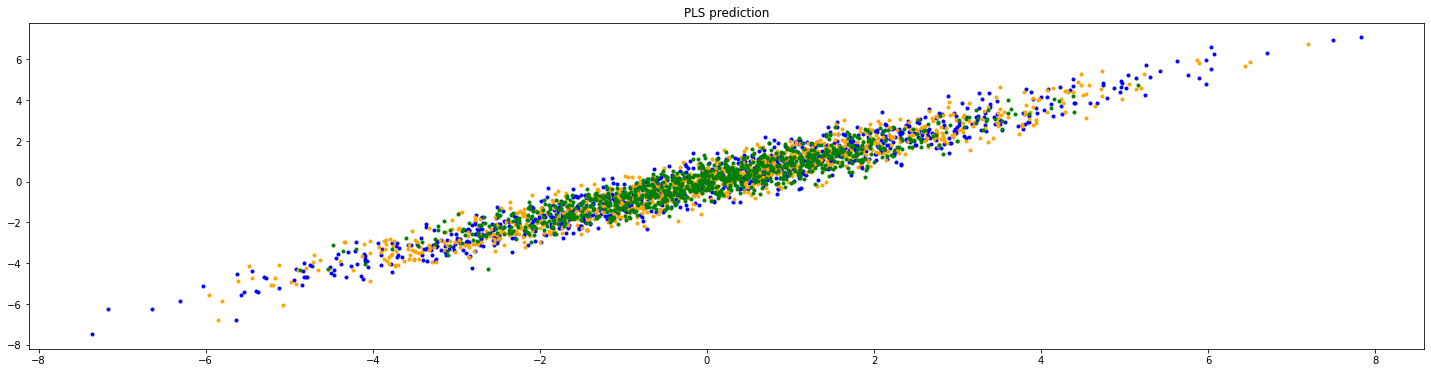

In [65]:
Y_hat = pls2.predict(X)
errors = Y - Y_hat

mse = mean_squared_error(Y, Y_hat)
print(f"{mse=}")

fig = plt.figure(figsize=(25,6))
plt.plot(Y[:,0], Y_hat[:,0], 'b.')
plt.plot(Y[:,1], Y_hat[:,1], '.', color='orange')
plt.plot(Y[:,2], Y_hat[:,2], 'g.')
plt.title('PLS prediction')
plt.show()

In [56]:
?plt.plot

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It&#39;s a shortcut string
notation described in the *Notes* section below.

&gt;&gt;&gt; plot(x, y)        # plot x and y using default line style and color
&gt;&gt;&gt; plot(x, y, &#39;bo&#39;)  # plot x and y using blue circle markers
&gt;&gt;&gt; plot(y)           # plot y using x as index array 0..N-1
&gt;&gt;&gt; plot(y, &#39;r+&#39;)     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

&gt;&gt;&

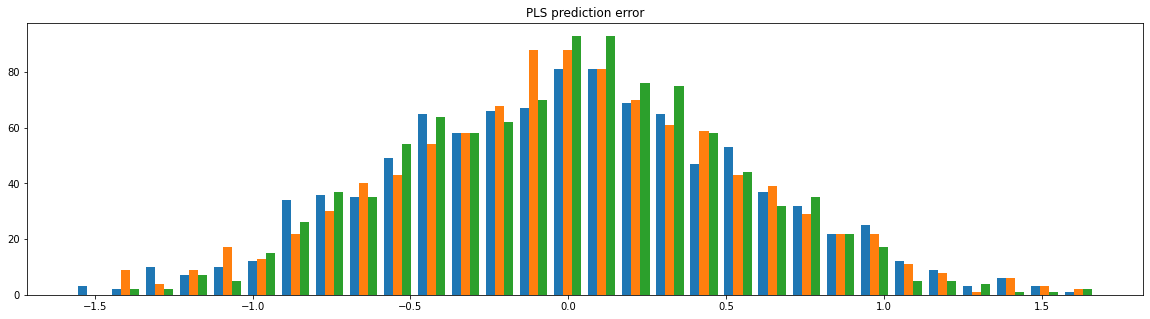

In [50]:
fig = plt.figure(figsize=(20,5))
plt.hist(errors, bins =30)
plt.title('PLS prediction error')
plt.show()